<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [20]:
import pandas as pd
%pip install seaborn

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [21]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [22]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [23]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [24]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [25]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [26]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns

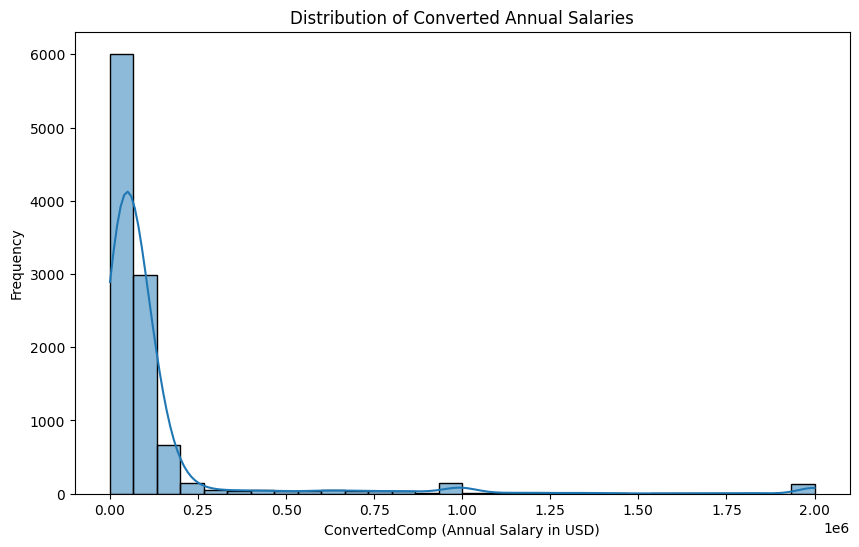

In [27]:
plt.figure(figsize=(10, 6))

# Plotting the distribution using Seaborn
sns.histplot(df['ConvertedComp'], kde=True, bins=30)

# Adding titles and labels
plt.title('Distribution of Converted Annual Salaries')
plt.xlabel('ConvertedComp (Annual Salary in USD)')
plt.ylabel('Frequency')

plt.show()

Plot the histogram for the column `ConvertedComp`.


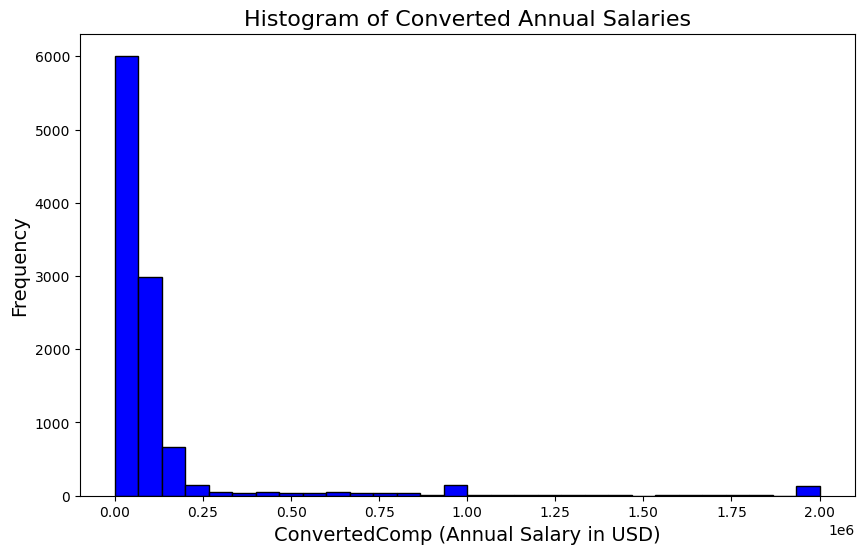

In [28]:
# Plotting the histogram for ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Converted Annual Salaries', fontsize=16)
plt.xlabel('ConvertedComp (Annual Salary in USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [30]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_converted_comp = df['ConvertedComp'].median()

# Display the result
print(f"The median of ConvertedComp is: {median_converted_comp}")

The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [31]:
# your code goes here

# Filter and count the respondents who identified only as "Man"
man_count = df[df['Gender'] == 'Man'].shape[0]

# Display the result
print(f"The number of respondents who identified as 'Man' is: {man_count}")

The number of respondents who identified as 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [32]:
# your code goes here

# Filter the respondents who identified as "Woman"
woman_respondents = df[df['Gender'] == 'Woman']

# Calculate the median of the ConvertedComp for "Woman"
median_converted_comp_woman = woman_respondents['ConvertedComp'].median()

# Display the result
print(f"The median ConvertedComp for respondents who identified as 'Woman' is: {median_converted_comp_woman}")

The median ConvertedComp for respondents who identified as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [33]:
# your code goes here
# Calculate the five-number summary for the Age column
five_number_summary = df['Age'].describe()

# Extract the specific values
min_age = five_number_summary['min']
q1_age = five_number_summary['25%']
median_age = five_number_summary['50%']
q3_age = five_number_summary['75%']
max_age = five_number_summary['max']

# Display the five-number summary
print("Five-Number Summary for Age:")
print(f"Minimum: {min_age}")
print(f"1st Quartile (Q1): {q1_age}")
print(f"Median (Q2): {median_age}")
print(f"3rd Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-Number Summary for Age:
Minimum: 16.0
1st Quartile (Q1): 25.0
Median (Q2): 29.0
3rd Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


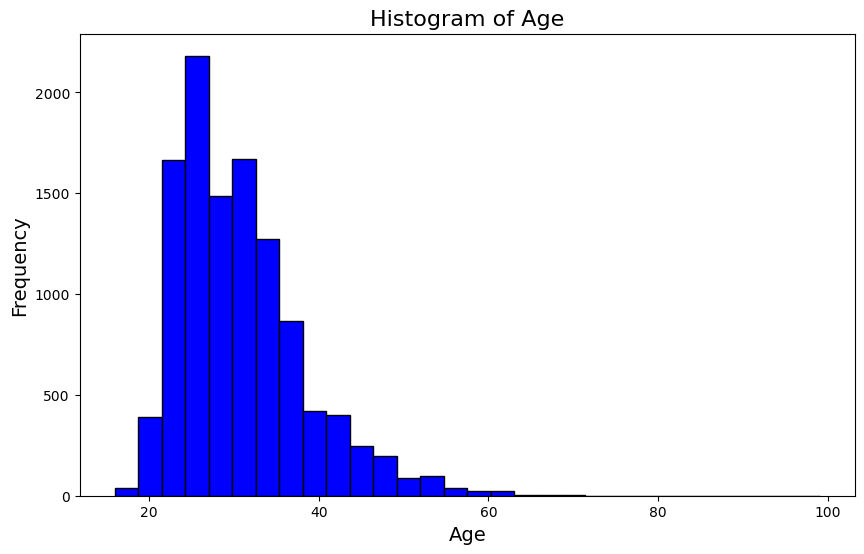

In [34]:
# your code goes here
# Plotting the histogram for the Age column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='blue', edgecolor='black')  # Drop NaN values

# Adding titles and labels
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


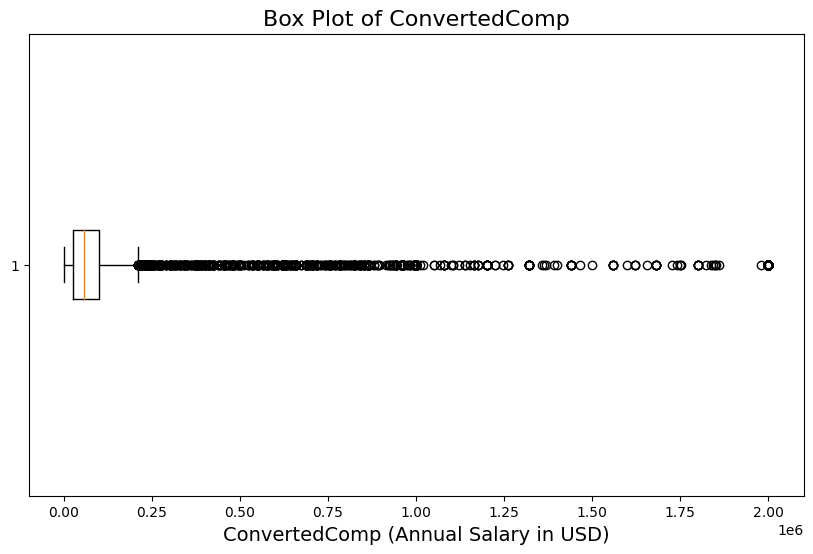

In [43]:
# your code goes here
# Create a box plot for the ConvertedComp column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)  # Drop NaN values for plotting

# Adding titles and labels
plt.title('Box Plot of ConvertedComp', fontsize=16)
plt.xlabel('ConvertedComp (Annual Salary in USD)', fontsize=14)

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [44]:
# your code goes here
# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Display the result
print(f"The Interquartile Range (IQR) for ConvertedComp is: {IQR}")

The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [45]:
# your code goes here
# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the results
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [47]:
# your code goes here
# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Display the result
print(f"The number of outliers in the ConvertedComp column is: {num_outliers}")

The number of outliers in the ConvertedComp column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [48]:
# your code goes here
# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the shape of the new DataFrame
print(f"The new DataFrame without outliers has {df_no_outliers.shape[0]} rows and {df_no_outliers.shape[1]} columns.")

The new DataFrame without outliers has 9703 rows and 85 columns.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [50]:
# your code goes here
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlations with Age
age_correlation = correlation_matrix['Age']

# Display the correlation with Age
print("Correlation of Age with other numerical columns:")
print(age_correlation)

Correlation of Age with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
